In [274]:
import tensorflow as tf

import numpy as np

import matplotlib as mplt

import plotly as plt
import pandas as pd

import plotly.graph_objects as go

from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn import svm

In [682]:
data = pd.read_csv('Mlbench.csv')
data

,x.1,x.2,classes
0,0.186167,0.046844,1
1,0.119351,0.070885,1
2,-0.555612,-0.221750,2
3,0.350295,0.013895,1
4,0.298074,0.035434,1
...,...,...,...
495,0.135152,-0.206962,2
496,-0.425906,-0.274678,2
497,0.923766,-0.015403,1
498,-0.614699,0.670945,2


In [685]:
y = data['classes']
x = pd.DataFrame( data['x.1'])
x['x.2'] =  data['x.2']

y = np.array(y)
x = np.array(x)

for i in range(y.shape[0]):
    if y[i]== 1:
        y[i] = -1
    else:
        y[i] = 1

In [686]:
data = tf.Variable(data)

In [687]:
X_train, X_test, y_train, y_test = train_test_split(x,y, train_size=0.70)

In [688]:
y_train = np.array(y_train)
y_test = np.array(y_test)
X_train = np.array(X_train)
X_test = np.array(X_test)

In [689]:
%matplotlib inline

In [700]:
colorsTrain = []
for i in range(y_train.shape[0]):
    if y_train[i] == 1:
        colorsTrain.append('red')
    else:
        colorsTrain.append('blue')
        

colorsTest = []
for i in range(y_test.shape[0]):
    if y_test[i] == -1:
        colorsTest.append('red')
    else:
        colorsTest.append('blue')       

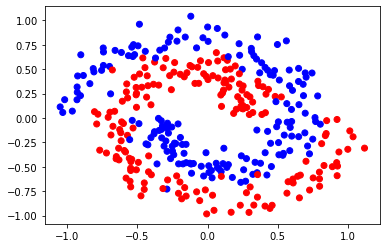

In [701]:
mplt.pyplot.scatter(X_train[:,0],X_train[:,1],color=np.array(colorsTrain))

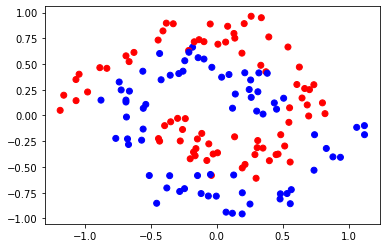

In [702]:
mplt.pyplot.scatter(X_test[:,0],X_test[:,1],color=np.array(colorsTest))

In [703]:
def modelo(kernel,C,X_train,y_train,X_test,y_test,plot):

    Model = svm.SVC(kernel=kernel,C=1)
    Model.fit(X_train,y_train)

    test = []
    for i in np.arange(-1,1,0.1):
        for j in np.arange(-1,1,0.1):
            test.append(np.array((i,j)))
            
    classeTest = Model.predict(test)

    yAprox = Model.predict(X_test)
    print(accuracy_score(y_test,yAprox))
    
    colorsTest = []
    for i in range(classeTest.shape[0]):
        if classeTest[i] == -1:
            colorsTest.append('red')
        if classeTest[i] == 1:
            colorsTest.append('blue')
            
    test = np.array(test)
    colorsTest = np.array(colorsTest)
    #classeTest = np.resize(classeTest, (int(classeTest.shape[0]/2), 2))
    
    if plot == 1:   
        mplt.pyplot.scatter(test[:,0],test[:,1],color=np.array(colorsTest))
        
    if plot == 2:
        mplt.pyplot.contour(test[:,0],test[:,1],classeTest, colors='black');
        print(test[:,0].shape,classeTest.shape)
        
        

def modelo1(kernel,C,X_train,y_train,X_test,y_test,plot):

    Model = svm.SVC(kernel=kernel,C=1)
    Model.fit(X_train,y_train)

    test = []

    for i in np.arange(-1,1,0.1):
        for j in np.arange(-1,1,0.1):
            test.append(np.array((i,j)))
            
    classeTest = Model.predict(test)
    
    test = np.array(test)
    aux,_ = np.meshgrid(np.arange(-1,1,0.1),np.arange(-1,1,0.1))
    aux = pd.DataFrame(aux)
                  
    return aux,classeTest


In [704]:
data,classeTest = modelo1('rbf',10,X_train,y_train,X_test,y_test,2)

In [705]:
num = 0
test = []

for i in np.arange(-1,1,0.1):
    for j in np.arange(-1,1,0.1):
        test.append(np.array((i,j)))
        

            
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = classeTest[num]
            
        num = num + 1
        

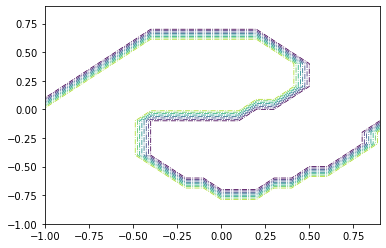

In [720]:
x = ["{:.2f}".format(item) for item in np.arange(-1,1,0.1)]

data.columns = x
data.index = x

colorsTest = []
for i in range(classeTest.shape[0]):
    if classeTest[i] == -1:
        colorsTest.append('red')
    if classeTest[i] == 1:
        colorsTest.append('blue')
        
xlim = np.arange(-1,1,0.1)
ylim = np.arange(-1,1,0.1)   
mplt.pyplot.contour(xlim,ylim,data,linestyles='dashdot',linewidths=0.8);
test = np.array(test)
colorsTest = np.array(colorsTest)

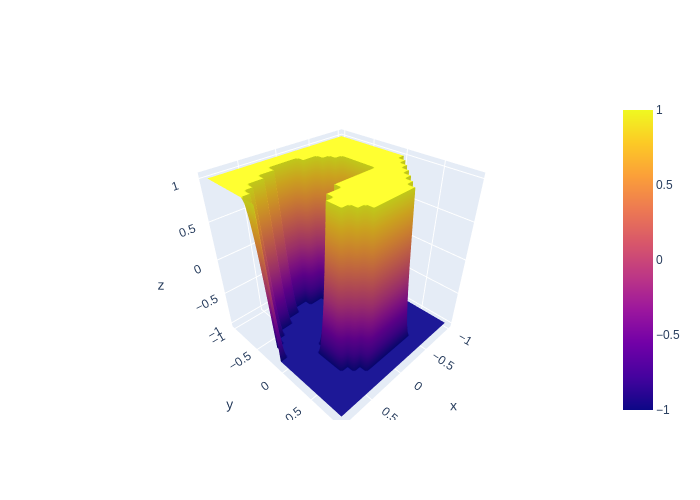

In [721]:
fig2 = go.Figure(data=go.Surface(x=xlim,y=ylim,z=data))
fig2.show(renderer="png")

0.9066666666666666


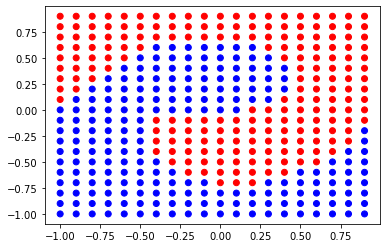

In [722]:

modelo('rbf',10,X_train,y_train,X_test,y_test,1)

0.52


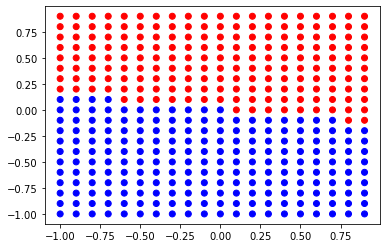

In [723]:
modelo('linear',10,X_train,y_train,X_test,y_test,1)

0.58


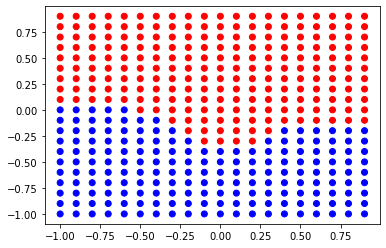

In [717]:
modelo('poly',.1,X_train,y_train,X_test,y_test,1)


0.41333333333333333


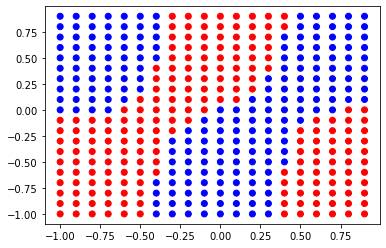

In [718]:
modelo('sigmoid',.1,X_train,y_train,X_test,y_test,True)